In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import glob
import re
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from plotnine import * 
import anndata

In [2]:
sys.path.insert(1, '/secure/projects/HTAPP_MBC/src/')

In [3]:
import init_phase2 as ini 

In [4]:
pd.set_option('display.max_columns', 500)
sc.settings.set_figure_params(dpi=80)

In [5]:
#plot settings
theme_set(theme_bw(base_size=10))
theme_update(axis_text=element_text(color="black"),panel_grid_major = element_blank(), panel_grid_minor = element_blank(),panel_background = element_rect(fill = "white"))
def rotate_labels (angle=60,vjust=1,hjust=1):
    return theme(axis_text_x = element_text(angle = angle, vjust = vjust,hjust=hjust))

In [6]:
baseDir="/scratch/projects/HTAPP_MBC/phase2/"
codeDir="/secure/projects/HTAPP_MBC"
dataDir=baseDir+"/pipeline/alignreads/"
out_dir=baseDir+"/PyCache"
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
cacheName="fresh"

In [7]:
adata_sc_proc=sc.read_h5ad(out_dir+"/fresh_selected.h5ad")
adata_sn_proc=sc.read_h5ad(out_dir+"/frozen_TST_selected.h5ad")

In [8]:
adata_sc=anndata.AnnData(X=adata_sc_proc.obsm['counts'],var=adata_sc_proc.raw.var,obs=adata_sc_proc.obs)
del adata_sc_proc

In [9]:
adata_sn=anndata.AnnData(X=adata_sn_proc.obsm['counts'],var=adata_sn_proc.raw.var,obs=adata_sn_proc.obs)
del adata_sn_proc

In [10]:
adata = adata_sn.concatenate(adata_sc, batch_categories=['sn', 'sc'])

In [11]:
adata

AnnData object with n_obs × n_vars = 552065 × 26538
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_prima

In [12]:
del adata_sc
del adata_sn

In [13]:
counts = adata.X

In [14]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

/secure/src/anaconda3/envs/scanpy/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [15]:
norm = adata

In [16]:
adata.obsm["counts"] = counts
adata.layers["counts"] = counts
adata.raw = norm

In [17]:
del counts
del norm

In [ ]:
sc.pp.highly_variable_genes(adata, batch_key="batch")

In [19]:
adata = adata[:, adata.var['highly_variable']]

/secure/src/anaconda3/envs/scanpy/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [20]:
%%capture
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']);

In [21]:
sc.pp.scale(adata, max_value=10)

In [22]:
sc.tl.pca(adata, svd_solver='arpack')

In [23]:
%%capture
sc.pp.neighbors(adata,random_state=42);

In [24]:
sc.tl.leiden(adata,random_state=42)

In [ ]:
sc.tl.umap(adata,random_state=42) #32

In [ ]:
%%capture
adata.write(out_dir+"/fresh_frozen_combined.h5ad",compression="gzip")

In [7]:
adata=sc.read_h5ad(out_dir+"/"+cacheName+".h5ad")

In [28]:
adata

AnnData object with n_obs × n_vars = 552065 × 2928
    obs: 'batch', 'cell_id', 'name', 'condition', 'replicate', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'labels', 'labels_score', 'labels_unif', 'labels_cl', 'labels_cl_unif', 'ccpm', 'Quality', 'Order', 'run status', 'Note', 'date', 'run_pipeline', 'Channel Name', 'Lane', 'Index', 'cancer', 'site', 'reference', 'chemistry', 'flowcell', 'seq_dir', 'mode', 'min_umis', 'min_genes', 'percent_mito', 'expected_cells', 'total_droplets', 'z_dim', 'z_layers', 'channel_id', 'label_concordance', 'labels_cl_unif_per_channel', 'filt_median_genes', 'filt_median_umi', 'pass', 'ccpm_id', 'ccpm_id_long', 'sample', 'htapp', 'sequenced', 'annotated', 'fresh', 'frozen', 'path_tumor_present', 'cohort', 'stage_at_diagnosis', 'metastatic_presentation', 'biopsy_days_after_dob', 'biopsy_days_after_diagnosis', 'biopsy_days_after_metastasis', 'prior_lines_tx_metastatic', 'prior_lines_tx_total', 'ER_primar

/secure/src/anaconda3/envs/scanpy/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


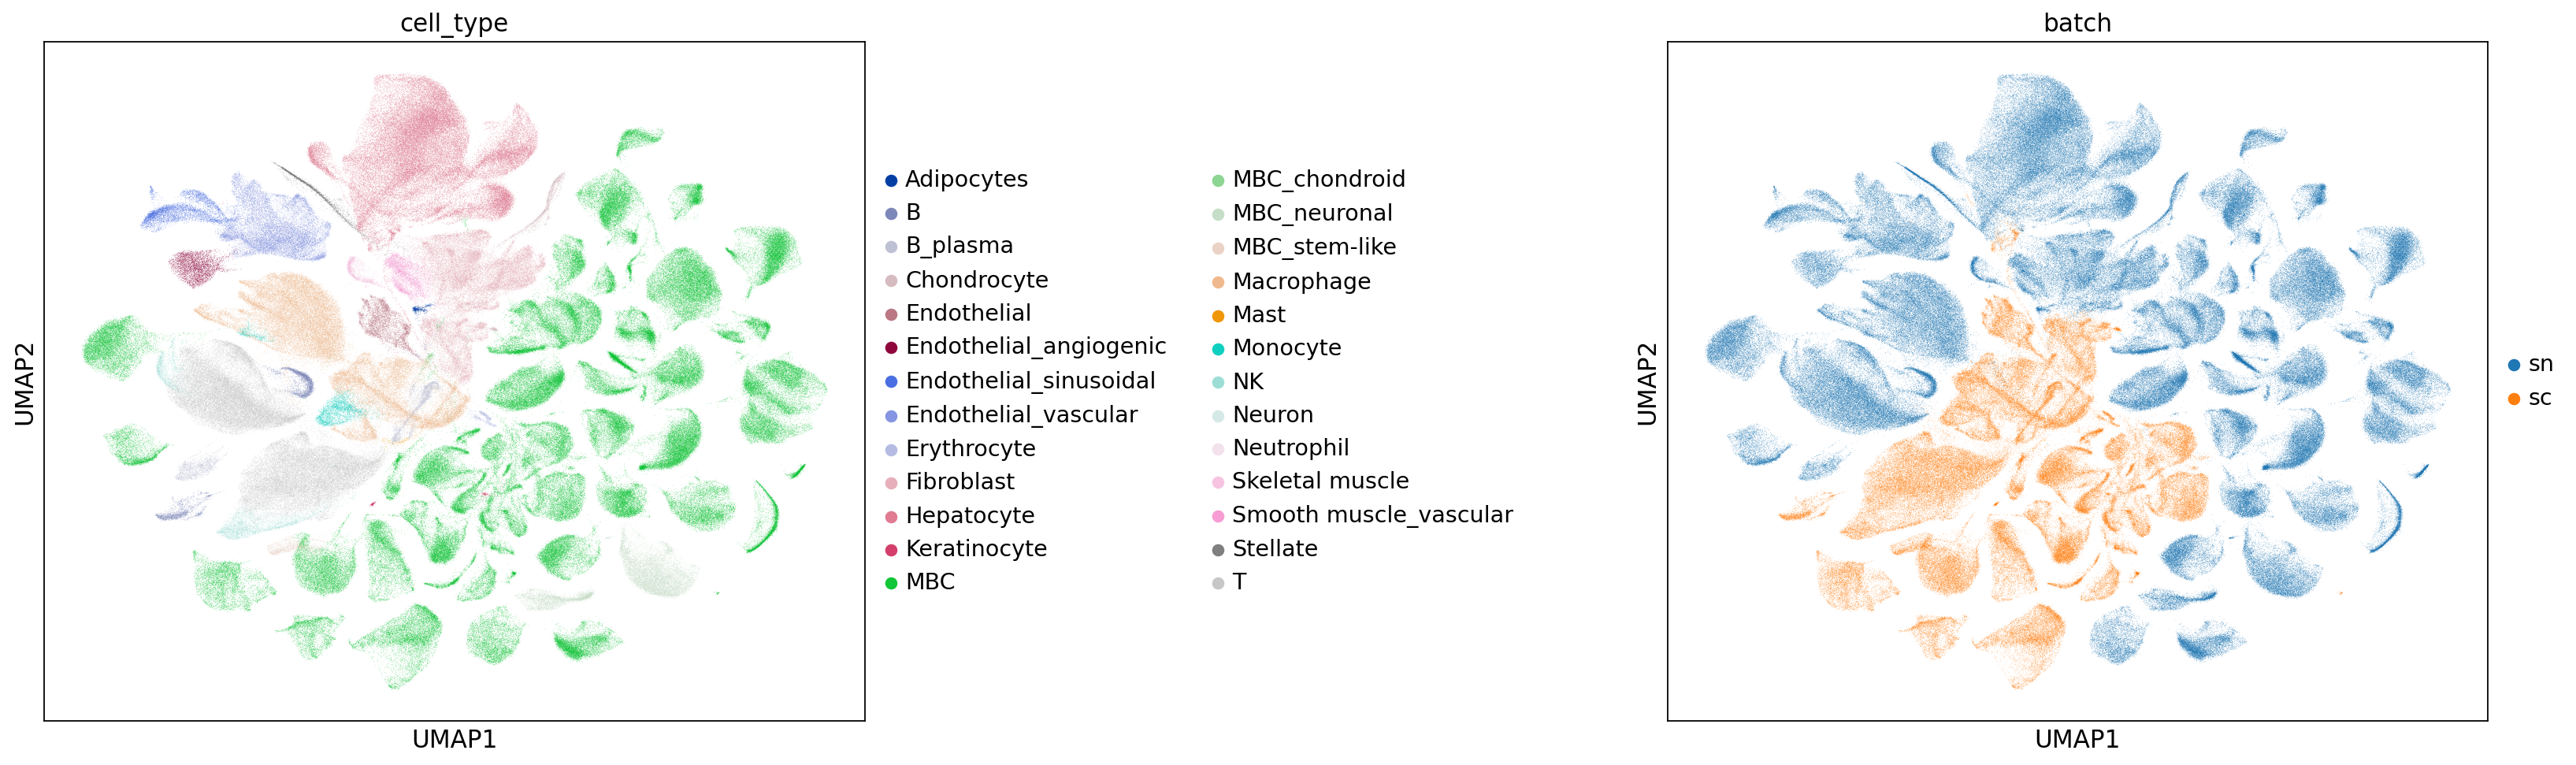

In [30]:
plt.rcParams['figure.figsize'] = [7, 7]
sc.pl.umap(adata, color=['cell_type','batch'],wspace=0.8)

In [33]:
from harmony import harmonize

In [34]:
Z = harmonize(adata.obsm['X_pca'], adata.obs, batch_key = 'batch')
adata.obsm['X_harmony'] = Z

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
Reach convergence after 2 iteration(s).


In [35]:
%%capture
sc.pp.neighbors(adata,random_state=42,use_rep='X_harmony',key_added='harmony_nn')

In [36]:
sc.tl.leiden(adata,random_state=42,neighbors_key='harmony_nn',key_added='harmony_leiden')

In [37]:
sc.tl.umap(adata,random_state=42,neighbors_key='harmony_nn')

/secure/src/anaconda3/envs/scanpy/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


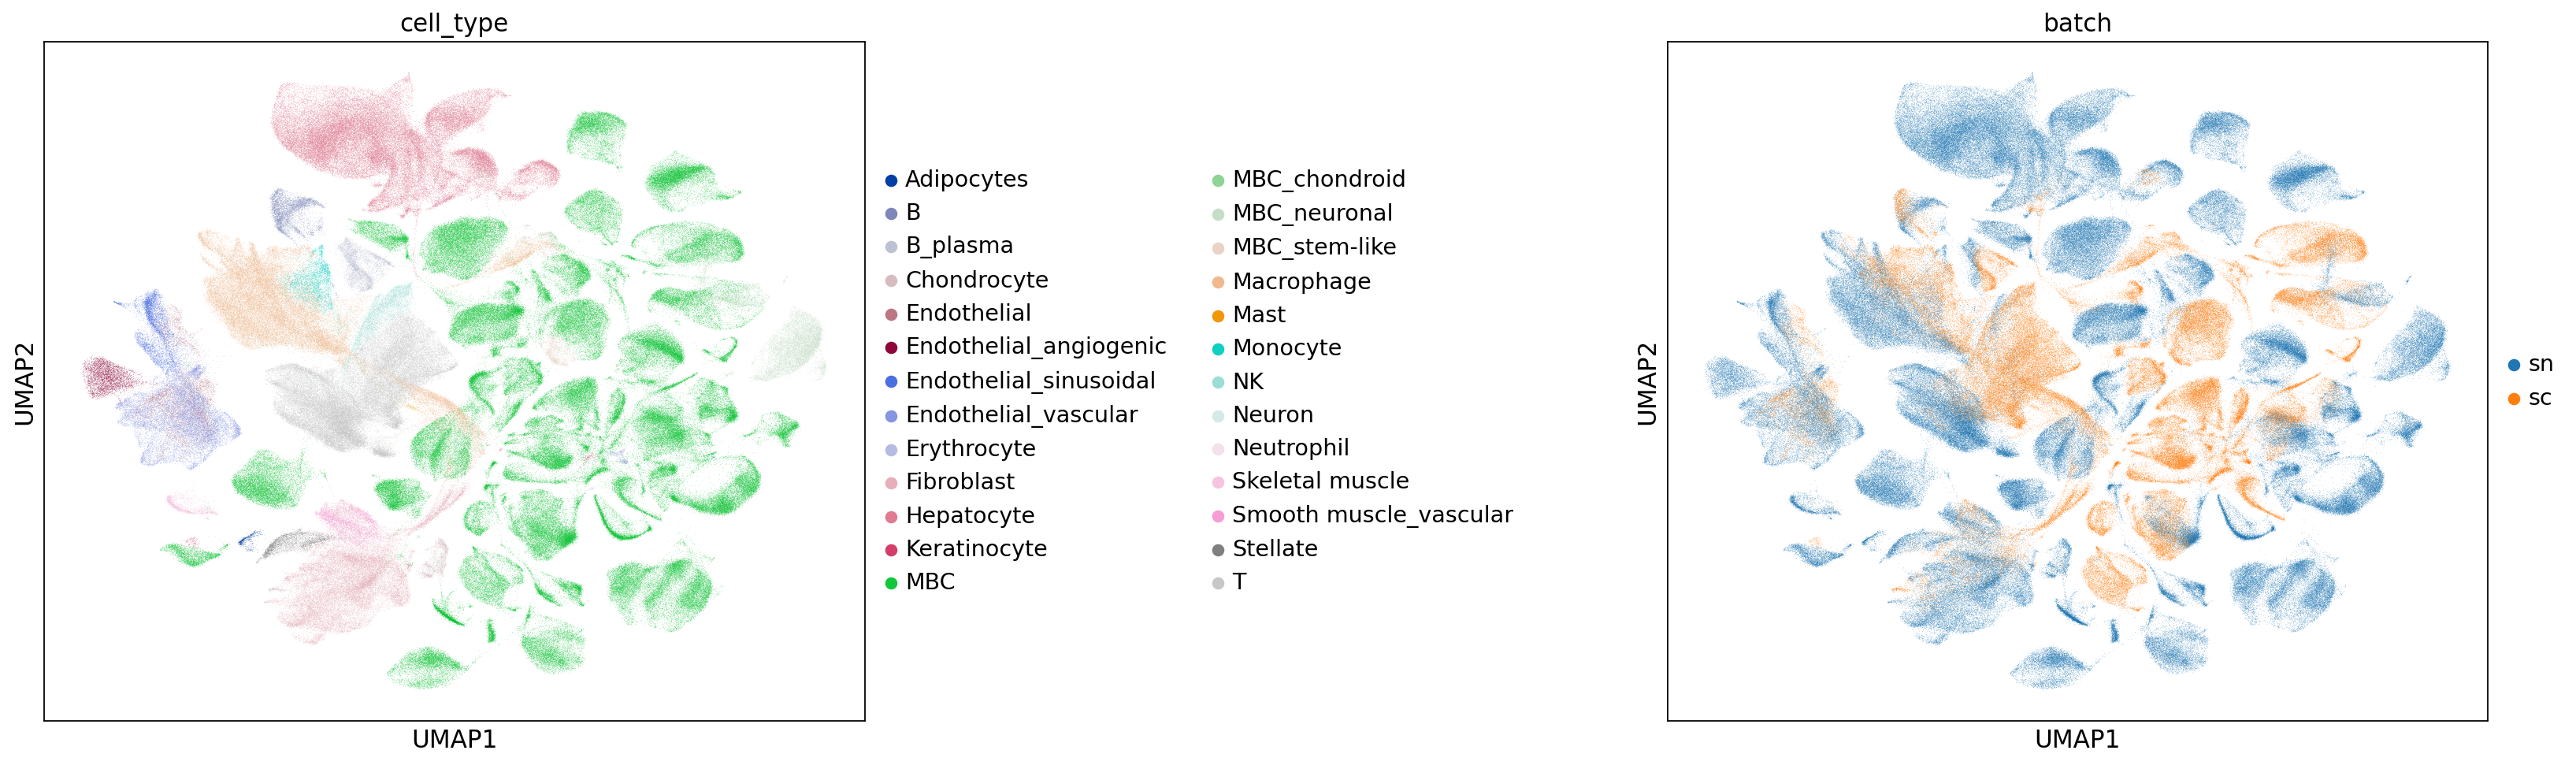

In [38]:
plt.rcParams['figure.figsize'] = [7, 7]
sc.pl.umap(adata, color=['cell_type','batch','compartments'],wspace=0.8)

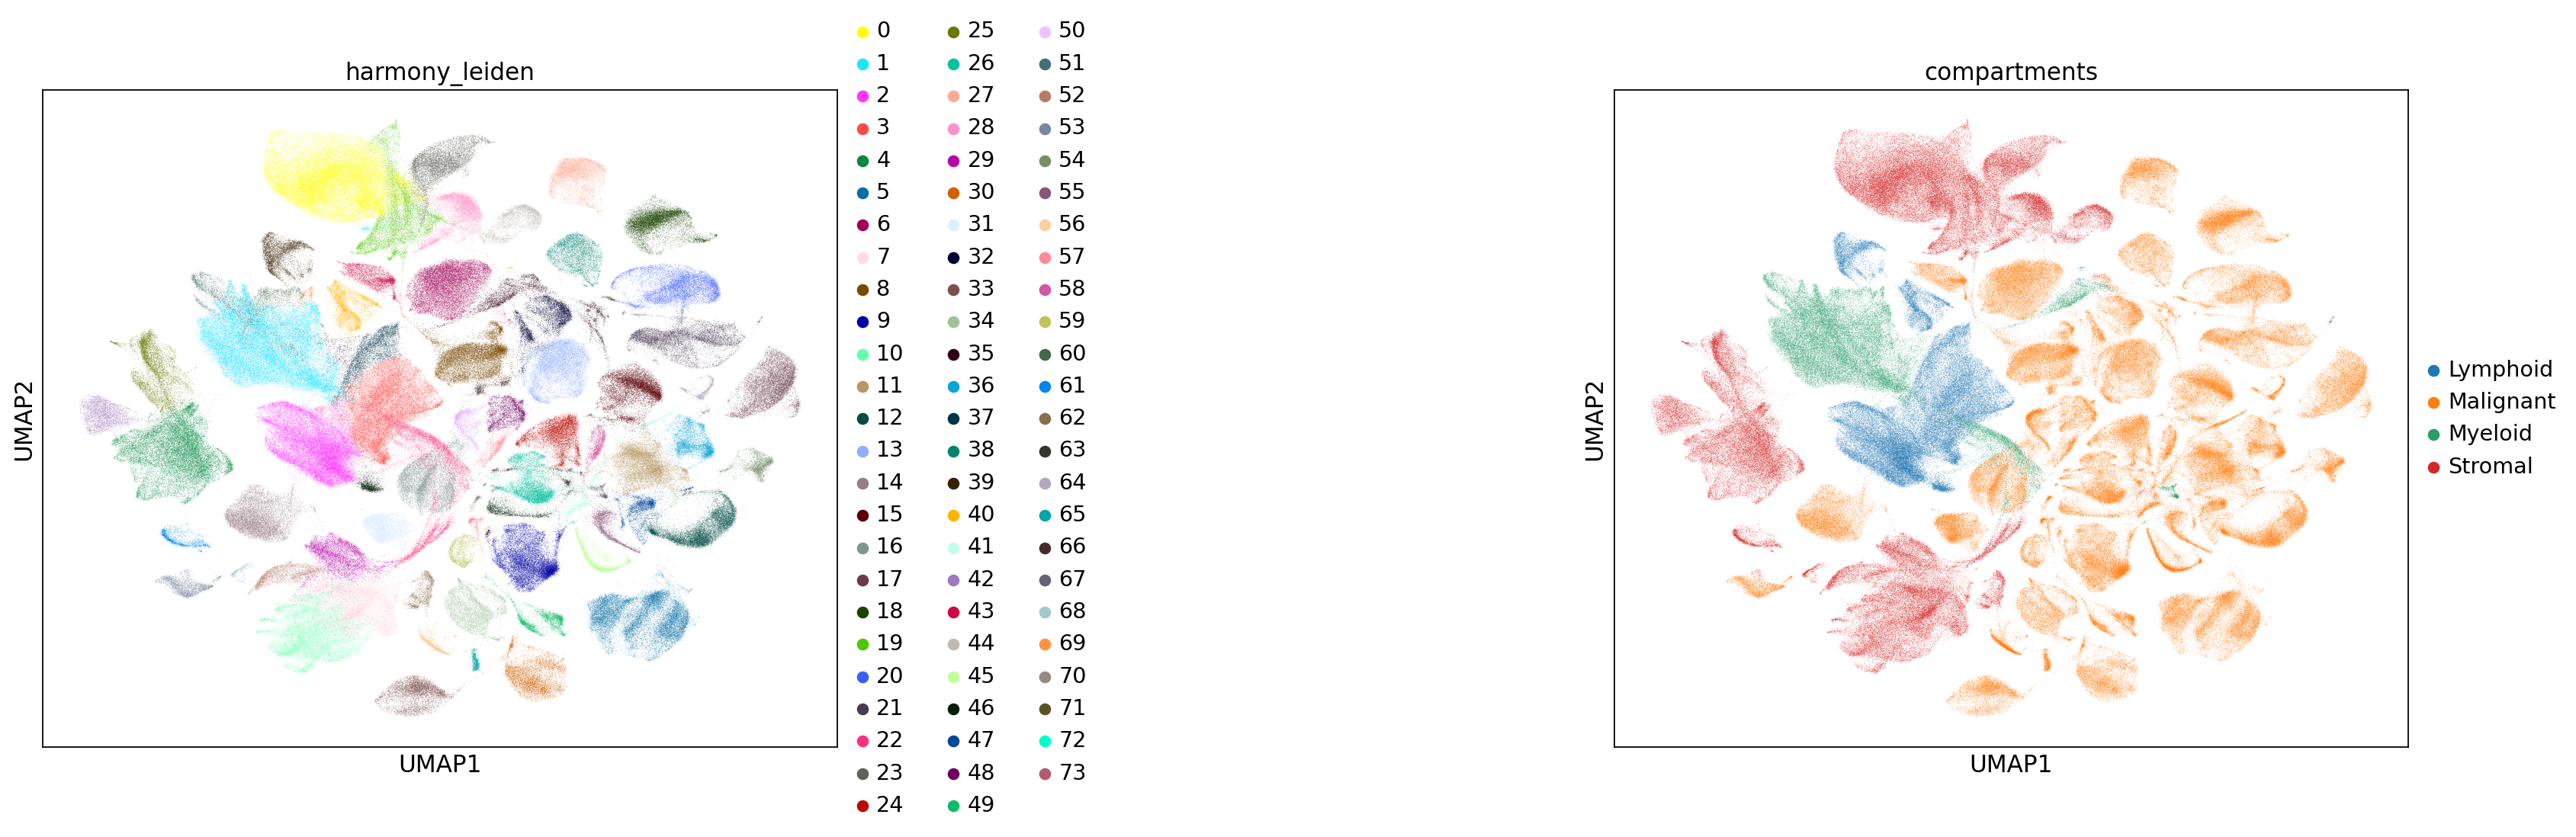

In [39]:
plt.rcParams['figure.figsize'] = [7, 7]
sc.pl.umap(adata, color=['harmony_leiden','compartments'],wspace=0.8)

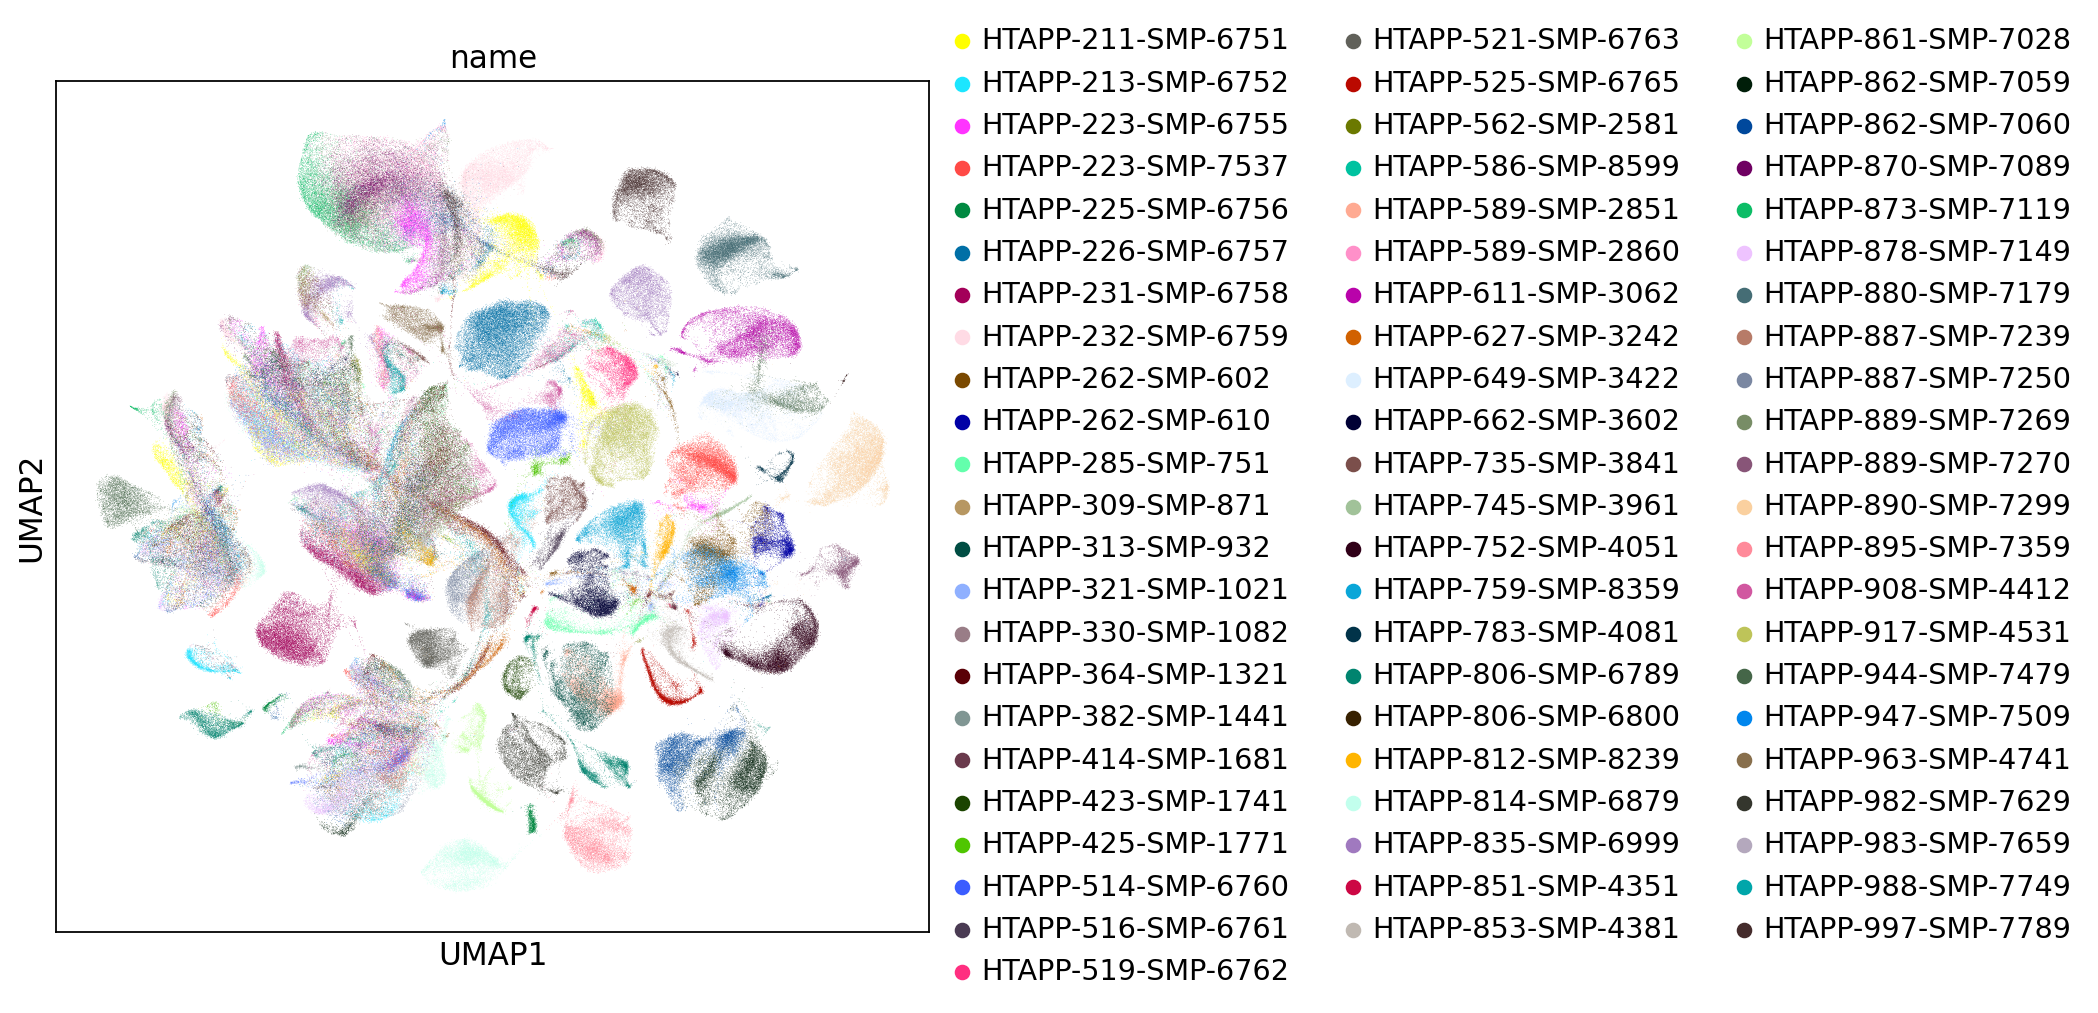

In [41]:
plt.rcParams['figure.figsize'] = [7, 7]
sc.pl.umap(adata, color=['name'],wspace=0.8)

In [40]:
adata.write(out_dir+"/fresh_frozen_combined.h5ad",compression="gzip")

In [ ]:
adata.obs.to_csv(out_dir+"/fresh_frozen_combined_obs.tsv", sep="\t")

In [8]:
adata_sel=sc.read_h5ad(out_dir+"/fresh_frozen_combined.h5ad")